# Import Library & Packages


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets


Dataset yang digunakan bersumber dari: https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset?resource=download

Data ini digunakan untuk mendukung penelitian dan pengembangan dalam meningkatkan pendidikan literasi digital pada daerah pedesaan. Data ini mencakup:


*   **Demografi** <br>
*   **Skor Pra-Pelatihan**<br>
*   **Skor Pasca-Pelatihan**<br>
*  **Keterlibatan**<br>
*   **Perilaku**<br>
*   **Skor Akhir**<br>

Kumpulan data ini digunakan untuk mengukur efektivitas program literasi digital dan memperoleh wawasan mengenai perilaku dan kemampuan peserta dalam berinteraksi dengan program yang disediakan.

In [97]:
df = pd.read_csv("digital_literacy_dataset.csv")
df.head()

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


# Pembersihan Data

Melakukan pembersihan kolom data yang dirasa tidak berguna:
*   User_ID
*   Household_Income


In [98]:
df.drop(["User_ID"], axis=1, inplace=True)
df.drop(["Household_Income"], axis=1, inplace=True)
df.columns = df.columns.str.replace(" ","_")

Menampilkan jumlah baris dan kolom <br>



In [99]:
print(f'(Baris, Kolom): {df.shape}\n')
df.info()

(Baris, Kolom): (1000, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           1000 non-null   int64  
 1   Gender                                        1000 non-null   object 
 2   Education_Level                               788 non-null    object 
 3   Employment_Status                             1000 non-null   object 
 4   Location_Type                                 1000 non-null   object 
 5   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 6   Internet_Usage_Score                          1000 non-null   int64  
 7   Mobile_Literacy_Score                         1000 non-null   int64  
 8   Post_Training_Basic_Computer_Knowledge_Score  1000 non-null   int64  
 9   Post_Training_Internet_Usage_Score  

Mengubah data kategorikal menjadi tipe data kategorikal

In [100]:
df['Gender'] = df['Gender'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Employment_Status'] = df['Employment_Status'].astype('category')
df['Location_Type'] = df['Location_Type'].astype('category')
df['Engagement_Level'] = df['Engagement_Level'].astype('category')
df['Employment_Impact'] = df['Employment_Impact'].astype('category')

Mencari nilai max, min, rata-rata, dan standar deviasi setiap kolom data


In [101]:
df.describe()

,Age,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Adaptability_Score,Feedback_Rating,Skill_Application,Overall_Literacy_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.864000,24.970000,24.822000,25.728000,60.141000,60.008000,60.572000,10.022000,20.010160,80.322000,19.994000,74.840000,2.998000,75.565000,60.23040
std,13.573568,14.838439,15.045088,15.002036,17.238628,17.646737,17.619059,3.188367,5.812247,11.967436,6.033603,14.446907,1.407827,14.852487,10.29046
min,18.000000,0.000000,0.000000,0.000000,21.000000,21.000000,20.000000,5.000000,10.070000,60.000000,10.000000,50.000000,1.000000,50.000000,32.40000
25%,29.000000,12.000000,12.000000,12.000000,47.000000,46.000000,47.000000,7.000000,15.010000,70.000000,15.000000,63.000000,2.000000,63.000000,53.27500
50%,41.000000,25.000000,25.000000,26.000000,61.000000,60.000000,61.000000,10.000000,20.005000,81.000000,20.000000,75.000000,3.000000,75.000000,60.30000
75%,52.000000,37.000000,38.000000,38.000000,73.000000,73.000000,74.000000,13.000000,24.955000,91.000000,25.000000,87.000000,4.000000,88.000000,67.12500
max,64.000000,50.000000,50.000000,50.000000,98.000000,100.000000,100.000000,15.000000,30.000000,100.000000,30.000000,100.000000,5.000000,100.000000,89.90000


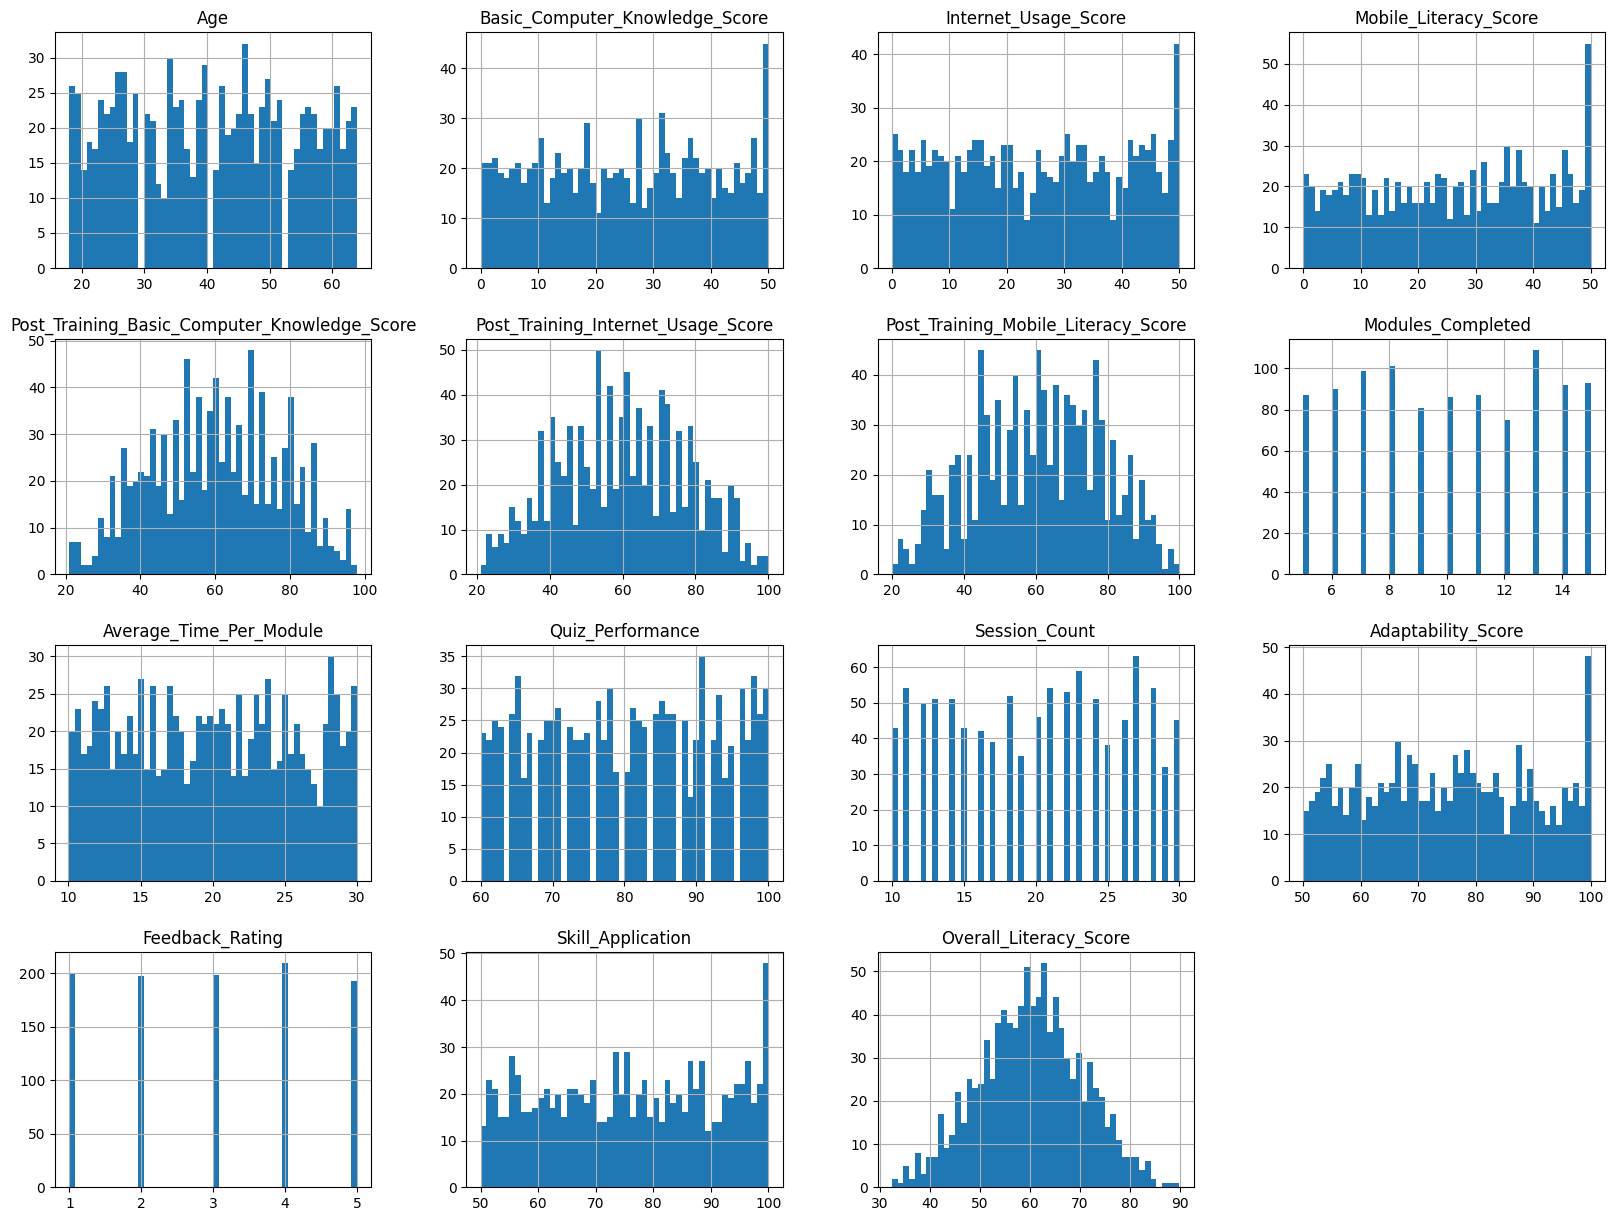

In [106]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Analisis Peserta Program

In [107]:
column_participants = ["Gender","Education_Level","Employment_Status","Location_Type", "Engagement_Level", "Employment_Impact"]

In [108]:
def plot_cat(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),"Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("======================================================")

  if plot:
      fig, axs = plt.subplots(1, 2, figsize=(4, 3))
      plt.subplot(1, 2, 1)
      sns.countplot(x=dataframe[col_name], data=dataframe)
      plt.title(f"Distribusi {col_name}")
      plt.xticks(rotation=90)

      plt.subplot(1, 2, 2)
      values = dataframe[col_name].value_counts()
      plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
      plt.title(f"Distribusi {col_name}")
      plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
      plt.show(block=True)

        Gender  Ratio
Gender               
Female     465   46.5
Male       446   44.6
Other       89    8.9


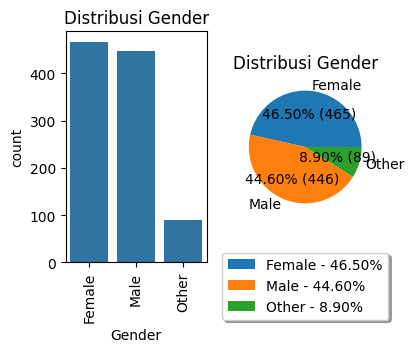

                 Education_Level  Ratio
Education_Level                        
Primary                      274   27.4
Secondary                    270   27.0
High School                  244   24.4


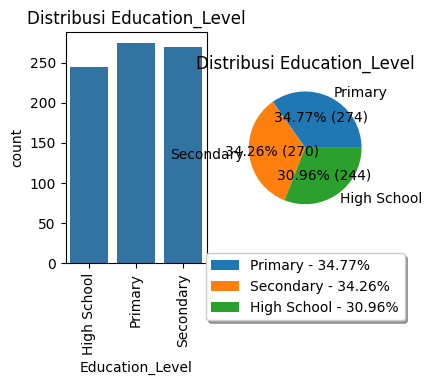

                   Employment_Status  Ratio
Employment_Status                          
Unemployed                       245   24.5
Self-Employed                    199   19.9
Farmer                           194   19.4
Other                            186   18.6
Student                          176   17.6


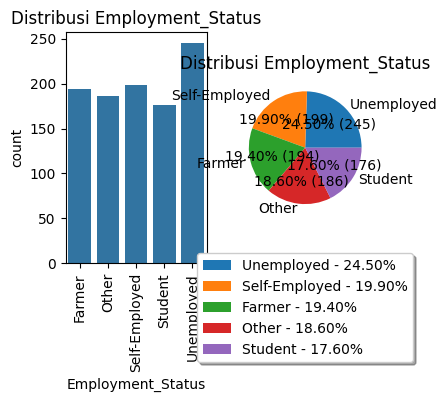

               Location_Type  Ratio
Location_Type                      
Rural                    702   70.2
Semi-Rural               298   29.8


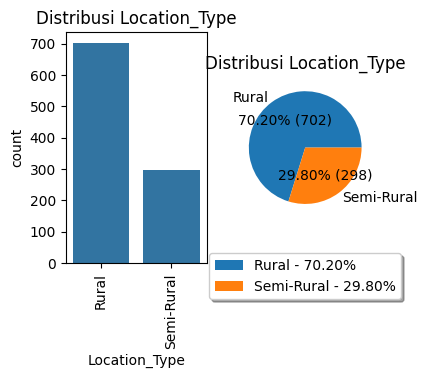

                  Engagement_Level  Ratio
Engagement_Level                         
Medium                         474   47.4
Low                            327   32.7
High                           199   19.9


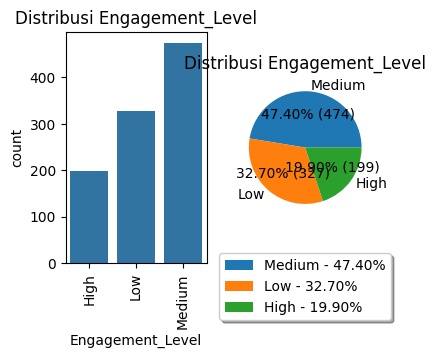

                   Employment_Impact  Ratio
Employment_Impact                          
No                               705   70.5
Yes                              295   29.5


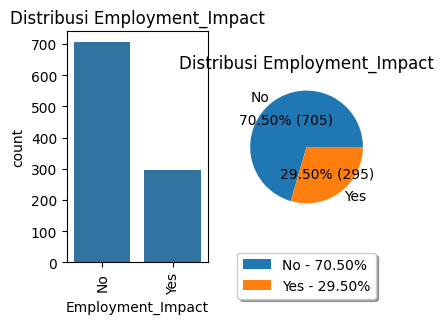

In [109]:
for i in column_participants:
  plot_cat(df, i, True)

# Korelasi Antar Data

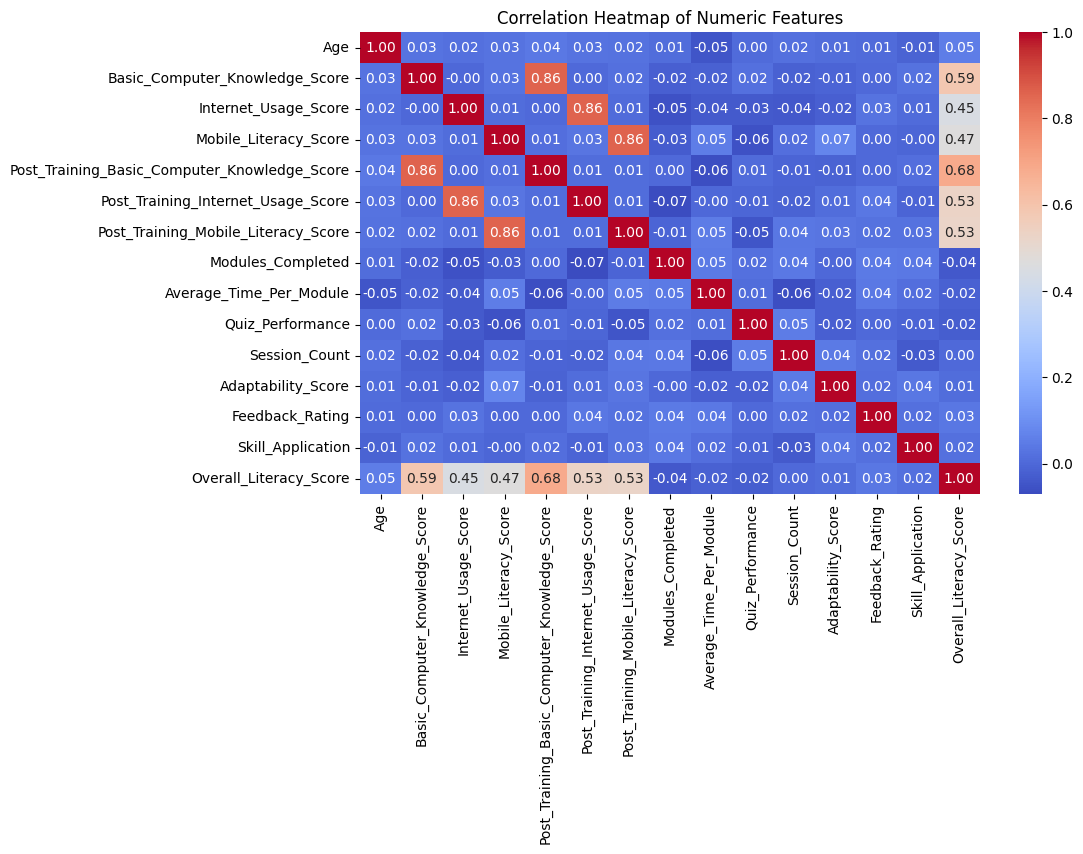

In [94]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Terdapat Peningkatan Skor Pengetahuan Daskom Peserta Sesudah Mengikuti Program



> Pada visualisasi data di bawah, terdapat tren menaik secara konsisten pada metriks kemampuan peserta dalam memahami dasar komputer setelah mengikuti program pelatihan



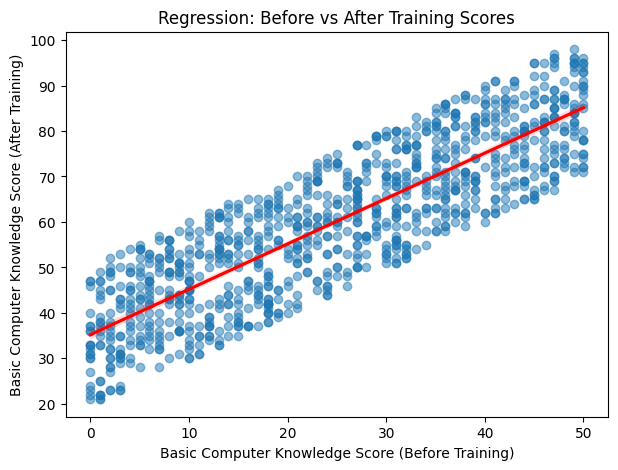

In [120]:
plt.figure(figsize=(7,5))
sns.regplot(x=df['Basic_Computer_Knowledge_Score'],
            y=df['Post_Training_Basic_Computer_Knowledge_Score'],
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("Basic Computer Knowledge Score (Before Training)")
plt.ylabel("Basic Computer Knowledge Score (After Training)")
plt.title("Regression: Before vs After Training Scores")
plt.show()


## Tidak Terdapat Perbedaan yang Signifikan pada Kemampuan Peserta Laki-laki dengan Kemampuan Peserta Perempuan


> Pada visualisasi data di bawah ini, kemampuan peserta dalam memahami dasar komputer diplot menggunakan warna sesuai jenis kelamin mereka. Dapat dilihat plotingan tersebar secara merata. Hal ini menunjukkan tidak terdapat perbedaan yang signifikan terhadap kemampuan peserta memahami dasar komputer



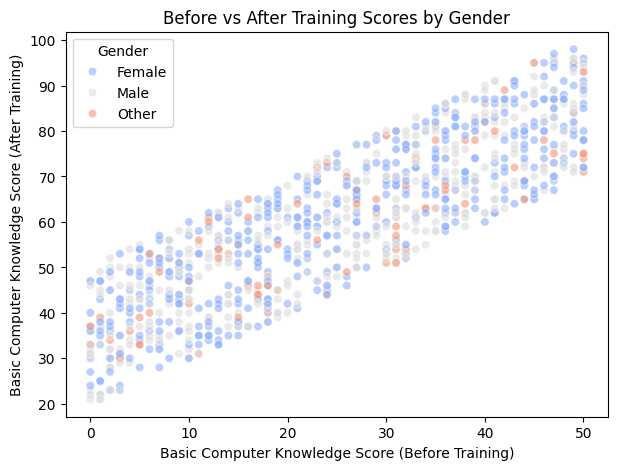

In [131]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Basic_Computer_Knowledge_Score'],
                y=df['Post_Training_Basic_Computer_Knowledge_Score'],
                hue=df['Gender'],
                alpha=0.6, palette="coolwarm")


plt.xlabel("Basic Computer Knowledge Score (Before Training)")
plt.ylabel("Basic Computer Knowledge Score (After Training)")
plt.title("Before vs After Training Scores by Gender")
plt.legend(title="Gender")
plt.show()


## Tidak Terdapat Perbedaan Skor Literasi Keseluruhan Antar Gender

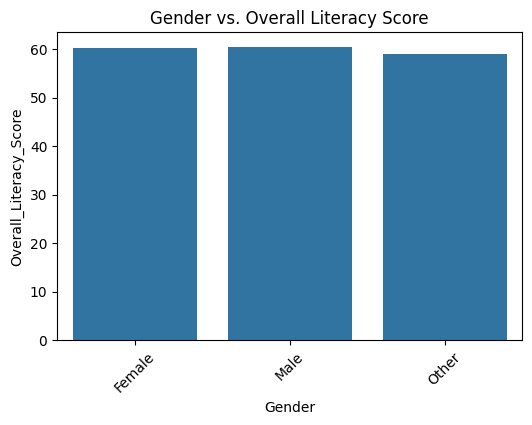

In [148]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Overall_Literacy_Score', data=df, errorbar=None)
plt.title('Gender vs. Overall Literacy Score')
plt.xticks(rotation=45)
plt.show()

## Tidak Terdapat Perbedaan Skor Literasi Keseluruhan Antar Tingkat Pendidikan

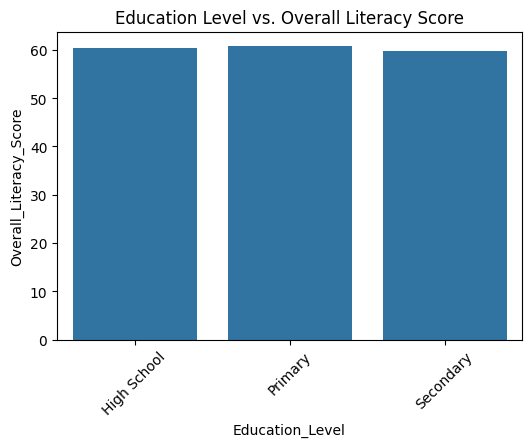

In [147]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Education_Level', y='Overall_Literacy_Score', data=df, errorbar=None)
plt.title('Education Level vs. Overall Literacy Score')
plt.xticks(rotation=45)
plt.show()

## Tidak Terdapat Perbedaan Skor Literasi Keseluruhan Antar Jenis Pekerjaan

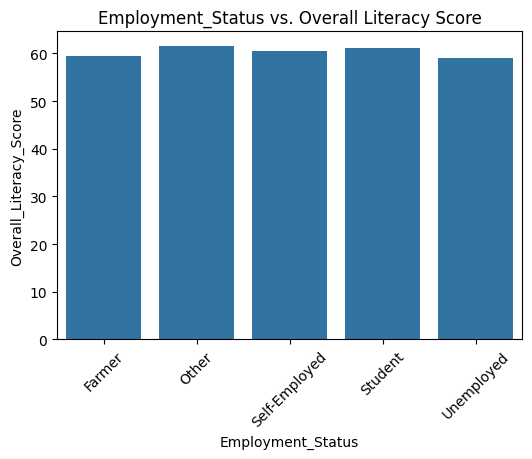

In [146]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Employment_Status', y='Overall_Literacy_Score', data=df, errorbar=None)
plt.title('Employment_Status vs. Overall Literacy Score')
plt.xticks(rotation=45)
plt.show()

## Tidak Terdapat Hubungan yang Signifikan antara Jumlah Modul yang Diselesaikan dengan Skor Literasi Keseluruhan

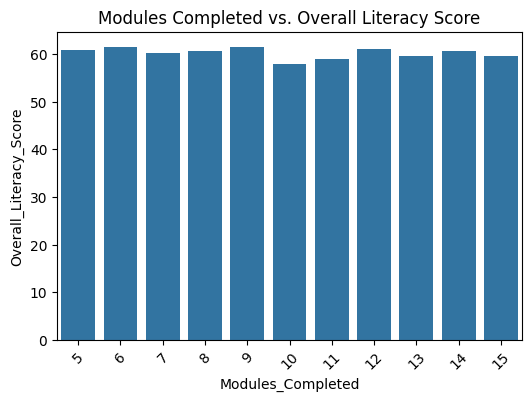

In [145]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Modules_Completed', y='Overall_Literacy_Score', data=df, errorbar=None)
plt.title('Modules Completed vs. Overall Literacy Score')
plt.xticks(rotation=45)
plt.show()

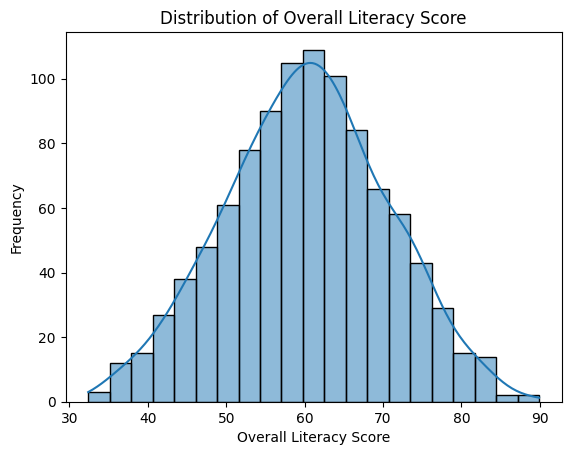

In [144]:
sns.histplot(df['Overall_Literacy_Score'], kde=True)
plt.title('Distribution of Overall Literacy Score')
plt.xlabel('Overall Literacy Score')
plt.ylabel('Frequency')
plt.show()

# Kesimpulan

Dari dataset yang digunakan, dapat ditarik beberapa poin:

*   Program diikuti oleh peserta dengan beragam demografis

*   Program terbukti efektif dalam memberikan penyuluhan tentang literasi digital pada penduduk desa. Hal ini terbukti pada peningkatan kemampuan literasi digital mereka pada grafik regresi (pengetahuan daskom, penggunaan internet, dan literasi seluler)

*   Tidak ada korelasi antara skor literasi digital peserta dengan jenis kelamin, tingkat pendidikan, atau pekerjaan mereka

*   Tidak ada korelasi antara skor literasi digital peserta dengan jumlah modul yang mereka selesaikan pada program

*   Tidak ada perbedaan kemampuan literasi pada peserta laki-laki dengan peserta perempuan

*   **Terdapat korelasi yang kuat** antara skor peserta sebelum mengikuti program (pengetahuan dasar komputer, penggunaan internet, dan literasi seluler) dengan skor literasi digital keseluruhan



